<a href="https://colab.research.google.com/github/Debby-Dev/examples/blob/master/Klasifikasi_Batu%2C_Gunting_dan_Kertas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Klasifikasi Gambar Batu, Kertas, dan Gunting**


***By. Debby Desniwati Samosir*** 

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-01 14:17:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.51MB/s    in 47s     

2020-11-01 14:18:38 (6.54 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Melakukan ekstraksi pada file zip

In [3]:
import zipfile,os
import shutil

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/'
train_dir = os.path.join(base_dir, 'rockpaperscissors')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images']

In [5]:
shutil.rmtree('/tmp/rockpaperscissors/rps-cv-images')

In [6]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors']

Menampung direktori dari setiap kelas pada direktori latih dan direktori validasi ke dalam variabel

In [7]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

proses augmentasi gambar

In [8]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4, 
                    )

In [9]:
train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical'
        )

validation_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='categorical',
        )

Found 2188 images belonging to 3 classes.
Found 2188 images belonging to 3 classes.


Membangun arsitektur sebuah CNN 

In [10]:
model = tf.keras.models.Sequential([
      # 1st layer
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      # 2nd layer
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # 3rd layer
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # 4th layer
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # Flattening process
      tf.keras.layers.Flatten(),
      # Dropout regularization to prevent overfitting
      tf.keras.layers.Dropout(0.5),
      # 5th layer (Hidden layer)
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')                   
])

Memanggil fungsi compile

In [11]:
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer='rmsprop', 
    metrics=['accuracy'])

Melatih model menggunakan metode fit

In [12]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 12s - loss: 1.1502 - accuracy: 0.3400 - val_loss: 1.0926 - val_accuracy: 0.4000
Epoch 2/20
25/25 - 11s - loss: 1.1097 - accuracy: 0.4760 - val_loss: 1.0248 - val_accuracy: 0.6600
Epoch 3/20
25/25 - 11s - loss: 0.9520 - accuracy: 0.5680 - val_loss: 0.9845 - val_accuracy: 0.5600
Epoch 4/20
25/25 - 11s - loss: 0.7737 - accuracy: 0.6840 - val_loss: 0.7759 - val_accuracy: 0.6000
Epoch 5/20
25/25 - 11s - loss: 0.7396 - accuracy: 0.7016 - val_loss: 0.5388 - val_accuracy: 0.8400
Epoch 6/20
25/25 - 11s - loss: 0.4424 - accuracy: 0.8200 - val_loss: 0.3226 - val_accuracy: 0.9400
Epoch 7/20
25/25 - 11s - loss: 0.4863 - accuracy: 0.7960 - val_loss: 0.4084 - val_accuracy: 0.8000
Epoch 8/20
25/25 - 11s - loss: 0.4715 - accuracy: 0.8160 - val_loss: 0.5358 - val_accuracy: 0.7800
Epoch 9/20
25/25 - 11s - loss: 0.3834 - accuracy: 0.8710 - val_loss: 0.3484 - val_accuracy: 0.8600
Epoch 10/20
25/25 - 11s - loss: 0.3525 - accuracy: 0.8669 - val_loss: 0.3170 - val_accuracy: 0.9000
Epoch 11/

 Memprediksi gambar dari model yang telah yang telah dibuat

Saving download.jpg to download (1).jpg
download.jpg
paper


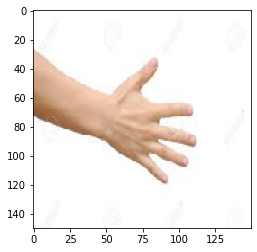

In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')